In [1]:
using BifurcationKit, LinearAlgebra, Plots, SparseArrays, Parameters, Setfield
const BK = BifurcationKit
using LaTeXStrings
using Interpolations
include("Additional_Function_02_11.jl")

Main.ExtraFun

In [2]:
N=100
function Fun_travelling_wave(X,p)
    @unpack W=p
    U=X[end-1]
    M=X[end]
    residual=similar(X)
    ExtraFun.FH_finite_difference(residual,X[1:end-2],W,U,M,p,N)
    return residual
end
#par_mod =(α=0.001,E=0.3,K=1.,Lsd=1.,M=1.,θ1=π/6,θ2=π/3,m=2.,T0=0.0,ltheta=0.01,turn_new=0.);
par_mod=(E = 0.51, K = 4.5, A = 1.0, Lsd = 0.12, U = 0.05, W = 2.0, M = 2.0, θ = 1.0, VdW = 0.1, γ = 9.6, mu0 = 0.3, S = Main.ExtraFun.S, expDC = 0.9822712330395684)
#sol0[end-1]=1.

(E = 0.51, K = 4.5, A = 1.0, Lsd = 0.12, U = 0.05, W = 2.0, M = 2.0, θ = 1.0, VdW = 0.1, γ = 9.6, mu0 = 0.3, S = Main.ExtraFun.S, expDC = 0.9822712330395684)

In [3]:
#par_mod =(E = 0.51, K = 1., A=0.05,Lsd = 0.12, U=0.05,W=2.,M =2., θ =1.,VdW=0.1,γ=0.5, mu0 = 0.5,S=ExtraFun.S,expDC = log10(1e-2));
sol0=ExtraFun.initial_cond_H_finite(N,par_mod,false);

No initial condition available. Default given


In [10]:
par_mod=@set par_mod.A=2.
opt_newton = NewtonPar(tol = 1e-9, verbose =true,maxIter=50)
prob = BifurcationProblem(Fun_travelling_wave,sol0,par_mod,(@lens _.E));
out=  newton(prob, opt_newton);
sol0=out.u
prob = BifurcationProblem(Fun_travelling_wave,out.u,par_mod,(@lens _.E),recordFromSolution= (x, p) -> x[end];)


┌─────────────────────────────────────────────────────┐
│ Newton Iterations      f(x)      Linear Iterations  │
├─────────────┬──────────────────────┬────────────────┤
│       0     │       8.4078e-01     │        0       │
│       1     │       5.1970e-02     │        1       │
│       2     │       1.2391e-04     │        1       │
│       3     │       5.7197e-10     │        1       │
└─────────────┴──────────────────────┴────────────────┘


┌─ Bifurcation Problem with uType Vector{Float64}
├─ Inplace:  false
├─ Symmetric: false
└─ Parameter: E

In [69]:
filename="initial_cond.txt"
using DelimitedFiles
open(filename,"w") do io
    writedlm(io,sol0,',')
end

In [32]:
par_mod=@set par_mod.expDC=log10(9.6)


(E = 0.51, K = 4.5, A = 3.5, Lsd = 0.12, U = 0.05, W = 2.0, M = 2.0, θ = 1.0, VdW = 0.1, γ = 0.5, mu0 = 0.5, S = Main.ExtraFun.S, expDC = 0.9822712330395684)

In [448]:
cont_par="mu0"

if cont_par=="K"
    prob = BifurcationProblem(Fun_travelling_wave,out.u,par_mod,(@lens _.K),recordFromSolution= (x, p) -> x[end];)
    opt_newton = NewtonPar(tol = 2e-8, verbose =false, maxIter = 2)
    opts_br = ContinuationPar(dsmin=0.0001,dsmax=0.05,ds=0.005, pMin=0.,pMax=200.,detectBifurcation=0,
           newtonOptions = opt_newton,saveSolEveryStep=1,maxSteps=2000)
    tangent=BK.continuation(prob,PALC(tangent=Bordered()),opts_br;plot=false);
    opts_br = ContinuationPar(dsmin=0.00001,dsmax=0.05,ds=-0.005, pMin=0.01,pMax=4.,detectBifurcation=1,
           newtonOptions = opt_newton,saveSolEveryStep=1,maxSteps=500)
    tangent2=BK.continuation(prob,PALC(tangent=Bordered()),opts_br;plot=false);
elseif cont_par=="gamma"
    prob = BifurcationProblem(Fun_travelling_wave,out.u,par_mod,(@lens _.γ),recordFromSolution= (x, p) -> x[end];)
    opt_newton = NewtonPar(tol = 2e-8, verbose =false, maxIter = 2)
    opts_br = ContinuationPar(dsmin=0.0001,dsmax=0.1,ds=0.005, pMin=0.01,pMax=2.,detectBifurcation=0,
           newtonOptions = opt_newton,saveSolEveryStep=1,maxSteps=2000)
    tangent=BK.continuation(prob,PALC(tangent=Bordered()),opts_br;plot=false);
    opts_br = ContinuationPar(dsmin=0.00001,dsmax=0.05,ds=-0.005, pMin=0.01,pMax=2.,detectBifurcation=1,
           newtonOptions = opt_newton,saveSolEveryStep=1,maxSteps=500)
    tangent2=BK.continuation(prob,PALC(tangent=Bordered()),opts_br;plot=false);
elseif cont_par=="A"
    prob = BifurcationProblem(Fun_travelling_wave,out.u,par_mod,(@lens _.A),recordFromSolution= (x, p) -> x[end];)
    opt_newton = NewtonPar(tol = 1e-8, verbose =false, maxIter = 2)
    opts_br = ContinuationPar(dsmin=0.0001,dsmax=0.1,ds=0.005, pMin=0.1,pMax=5.,detectBifurcation=0,
           newtonOptions = opt_newton,saveSolEveryStep=1,maxSteps=500)
    tangent=BK.continuation(prob,PALC(tangent=Bordered()),opts_br;plot=false);
    opts_br = ContinuationPar(dsmin=0.00001,dsmax=0.05,ds=-0.005, pMin=0.1,pMax=5.,detectBifurcation=0,
           newtonOptions = opt_newton,saveSolEveryStep=1,maxSteps=500)
    tangent2=BK.continuation(prob,PALC(tangent=Bordered()),opts_br;plot=false);
elseif cont_par=="VdW"
    prob = BifurcationProblem(Fun_travelling_wave,out.u,par_mod,(@lens _.VdW),recordFromSolution= (x, p) -> x[end];)
    opt_newton = NewtonPar(tol = 5e-8, verbose =false, maxIter = 3)
    opts_br = ContinuationPar(dsmin=0.0001,dsmax=0.1,ds=0.005, pMin=0.0,pMax=1.,detectBifurcation=0,
           newtonOptions = opt_newton,saveSolEveryStep=1,maxSteps=2000)
    tangent=BK.continuation(prob,PALC(tangent=Bordered()),opts_br;plot=false);
    opts_br = ContinuationPar(dsmin=0.00001,dsmax=0.05,ds=-0.005, pMin=0.0,pMax=0.2,detectBifurcation=0,
           newtonOptions = opt_newton,saveSolEveryStep=1,maxSteps=500)
    tangent2=BK.continuation(prob,PALC(tangent=Bordered()),opts_br;plot=false);
elseif cont_par=="theta"
    prob = BifurcationProblem(Fun_travelling_wave,out.u,par_mod,(@lens _.θ),recordFromSolution= (x, p) -> x[end];)
    opt_newton = NewtonPar(tol = 1e-8, verbose =false, maxIter = 2)
    opts_br = ContinuationPar(dsmin=0.0001,dsmax=0.1,ds=0.005, pMin=0.0001,pMax=2.,detectBifurcation=0,
           newtonOptions = opt_newton,saveSolEveryStep=1,maxSteps=200)
    tangent=BK.continuation(prob,PALC(tangent=Bordered()),opts_br;plot=false);
    opts_br = ContinuationPar(dsmin=0.00001,dsmax=0.05,ds=-0.005, pMin=0.0001,pMax=2.,detectBifurcation=1,
           newtonOptions = opt_newton,saveSolEveryStep=1,maxSteps=1000)
    tangent2=BK.continuation(prob,PALC(tangent=Bordered()),opts_br;plot=false);
elseif cont_par=="mu0"
    prob = BifurcationProblem(Fun_travelling_wave,out.u,par_mod,(@lens _.mu0),recordFromSolution= (x, p) -> x[end];)
    opt_newton = NewtonPar(tol = 1e-8, verbose =false, maxIter = 2)
    opts_br = ContinuationPar(dsmin=0.0001,dsmax=0.1,ds=0.0001, pMin=-4.,pMax=20.,detectBifurcation=0,
           newtonOptions = opt_newton,saveSolEveryStep=1,maxSteps=2000)
    tangent=BK.continuation(prob,PALC(tangent=Bordered()),opts_br;plot=false);
    opts_br = ContinuationPar(dsmin=0.00001,dsmax=0.05,ds=-0.0001, pMin=0.5,pMax=3.,detectBifurcation=1,
           newtonOptions = opt_newton,saveSolEveryStep=1,maxSteps=500)
    tangent2=BK.continuation(prob,PALC(tangent=Bordered()),opts_br;plot=false);
elseif cont_par=="W"
    prob = BifurcationProblem(Fun_travelling_wave,out.u,par_mod,(@lens _.WM),recordFromSolution= (x, p) -> x[end];)
    opt_newton = NewtonPar(tol = 2e-8, verbose =false, maxIter = 2)
    opts_br = ContinuationPar(dsmin=0.0001,dsmax=0.05,ds=0.005, pMin=0.,pMax=10.,detectBifurcation=0,
           newtonOptions = opt_newton,saveSolEveryStep=1,maxSteps=200)
    tangent=BK.continuation(prob,PALC(tangent=Bordered()),opts_br;plot=false);
    
elseif cont_par=="slip"
    prob = BifurcationProblem(Fun_travelling_wave,out.u,par_mod,(@lens _.Lsd),recordFromSolution= (x, p) -> x[end];)
    opt_newton = NewtonPar(tol = 2e-8, verbose =false, maxIter = 2)
    opts_br = ContinuationPar(dsmin=0.0001,dsmax=0.05,ds=0.005, pMin=0.,pMax=2.,detectBifurcation=0,
           newtonOptions = opt_newton,saveSolEveryStep=1,maxSteps=200)
    tangent=BK.continuation(prob,PALC(tangent=Bordered()),opts_br;plot=false);
    opts_br = ContinuationPar(dsmin=0.00001,dsmax=0.05,ds=-0.005, pMin=0.0,pMax=2.,detectBifurcation=1,
           newtonOptions = opt_newton,saveSolEveryStep=1,maxSteps=800)
    tangent2=BK.continuation(prob,PALC(tangent=Bordered()),opts_br;plot=false);
elseif cont_par=="E"
    prob = BifurcationProblem(Fun_travelling_wave,out.u,par_mod,(@lens _.E),recordFromSolution= (x, p) -> x[end];)
    opt_newton = NewtonPar(tol = 1e-7, verbose =false, maxIter = 2)
    opts_br = ContinuationPar(dsmin=0.0001,dsmax=0.05,ds=0.005, pMin=0.,pMax=2.,detectBifurcation=0,
           newtonOptions = opt_newton,saveSolEveryStep=1,maxSteps=400)
    tangent=BK.continuation(prob,PALC(tangent=Bordered()),opts_br;plot=false);
    opts_br = ContinuationPar(dsmin=0.00001,dsmax=0.05,ds=-0.005, pMin=0.05,pMax=5.,detectBifurcation=1,
           newtonOptions = opt_newton,saveSolEveryStep=1,maxSteps=500)
    tangent2=BK.continuation(prob,PALC(tangent=Bordered()),opts_br;plot=false);
end

 ┌─ Number of points: 63
 ├─ Curve of EquilibriumCont
 ├─ Type of vectors: Vector{Float64}
 ├─ Parameter mu0 starts at 2.0, ends at 0.5
 ├─ Algo: PALC
 └─ Special points:

If `br` is the name of the branch,
ind_ev = index of the bifurcating eigenvalue e.g. `br.eig[idx].eigenvals[ind_ev]`

- #  1, endpoint at mu0 ≈ +0.50000000,                                                                     step =  62


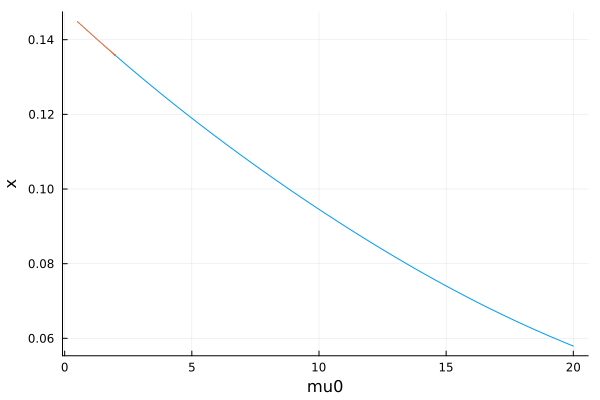

In [450]:
plot(tangent)
plot!(tangent2)

In [318]:
U_vec= Vector{Float64}()
W_vec= Vector{Float64}()
E_vec= Vector{Float64}()
M_vec= Vector{Float64}()

solution_B=[]
M_vec=Vector{Float64}()
λs=Vector{Float64}()
solution_H=[]
par_mod_new=par_mod
for el in reverse(tangent.sol)
   # par_mod_new=@set par_mod_new.E=el.p
    append!(U_vec,el.x[end-1])    
    append!(W_vec,par_mod.W)    

    append!(E_vec,el.p)    
    append!(M_vec,el.x[end])
    append!(solution_H,ExtraFun.export_h(el.x[1:end-2],U_vec[end],W_vec[end],par_mod_new,N))


end
for el in reverse(tangent2.sol)
    #par_mod_new=@set par_mod_new.θ1=el.p
    append!(U_vec,el.x[end-1])    
    append!(W_vec,par_mod.W)    

    append!(E_vec,el.p)    
    append!(M_vec,el.x[end])

    append!(solution_H,ExtraFun.export_h(el.x[1:end-2],U_vec[end],W_vec[end],par_mod_new,N))

end
solution_H=reshape(solution_H,N+1,length(E_vec));


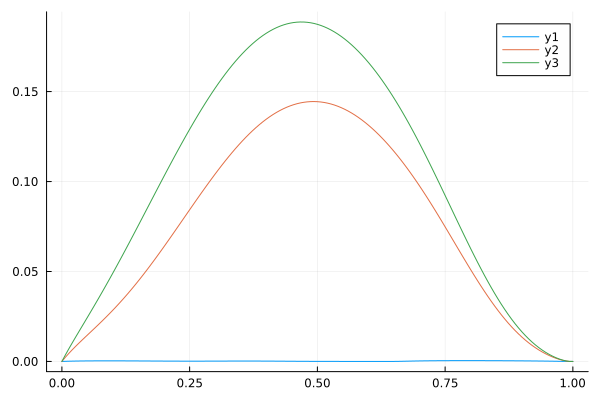

In [319]:
dx=1/N
xx=range(0,1,step=dx)
indeces=sortperm((E_vec.-0.01).^2);
plot(xx,solution_H[:,indeces[1]])
indeces=sortperm((E_vec.-0.35).^2);
plot!(xx,solution_H[:,indeces[3]])
indeces=sortperm((E_vec.-0.5).^2);
plot!(xx,solution_H[:,indeces[9]])

In [123]:
Estar=2.
indeces=sortperm((W_vec.-Estar).^2);
idx=1
sol0[end]=M_vec[indeces[idx]]

sol0[end-1]=U_vec[indeces[idx]]
sol0[1:end-2]=solution_H[2:end-1,indeces[idx]]/W_vec[indeces[idx]]
par_mod=@set par_mod.W=Estar#E_vec[indeces[idx]]

(E = 0.75, K = 1.0, A = 5.0, Lsd = 0.25, U = 0.05, W = 2.0, M = 2.0, θ = 0.75, VdW = 0.1, γ = 0.5, mu0 = 0.5, S = Main.ExtraFun.S, expDC = -2.0)

In [103]:
par_mod=@set par_mod.A=3.5
opt_newton = NewtonPar(tol = 1e-9, verbose =true,maxIter=50)
prob = BifurcationProblem(Fun_travelling_wave,sol0,par_mod,(@lens _.E));
out=  newton(prob, opt_newton);
sol0=out.u
prob = BifurcationProblem(Fun_travelling_wave,out.u,par_mod,(@lens _.E),recordFromSolution= (x, p) -> x[end];)


┌─────────────────────────────────────────────────────┐
│ Newton Iterations      f(x)      Linear Iterations  │
├─────────────┬──────────────────────┬────────────────┤
│       0     │       4.7824e+00     │        0       │
│       1     │       5.3580e-01     │        1       │
│       2     │       1.2346e-02     │        1       │
│       3     │       5.6460e-06     │        1       │
│       4     │       1.3157e-10     │        1       │
└─────────────┴──────────────────────┴────────────────┘


┌─ Bifurcation Problem with uType Vector{Float64}
├─ Inplace:  false
├─ Symmetric: false
└─ Parameter: E

In [11]:
prob = BifurcationProblem(Fun_travelling_wave,out.u,par_mod,(@lens _.W),recordFromSolution= (x, p) -> x[end];)

opt_newton = NewtonPar(tol = 1e-8, verbose =false, maxIter = 2)
opts_br = ContinuationPar(dsmin=0.0005,dsmax=0.4,ds=0.01, pMin=0.01,pMax=10.,detectBifurcation=0,
       newtonOptions = opt_newton,saveSolEveryStep=1,maxSteps=2000)
branch=BK.continuation(prob,PALC(),opts_br;plot=false);
opts_br = ContinuationPar(dsmin=0.0005,dsmax=0.2,ds=-0.005, pMin=1.,pMax=5.,detectBifurcation=0,
       newtonOptions = opt_newton,saveSolEveryStep=1,maxSteps=500);
branch2=BK.continuation(prob,PALC(),opts_br;plot=false);

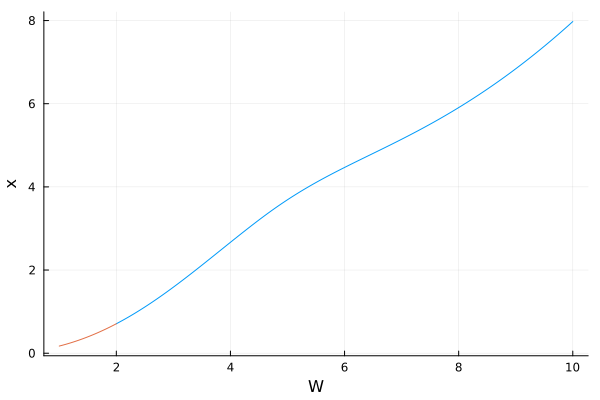

In [12]:
plot(branch)
plot!(branch2)

In [280]:

ExtraFun.S(1.2,par_mod)

1.9999997749296758

In [281]:
(tanh((abs(1.2)-0.01)/0.001)+tanh((1. -abs(1.2))/0.1))

0.0359724199241831

In [13]:
U_vec= Vector{Float64}()
W_vec= Vector{Float64}()
E_vec= Vector{Float64}()
M_vec= Vector{Float64}()
solution_B=[]
M_vec=Vector{Float64}()
λs=Vector{Float64}()
solution_H=[]
solution_F=[]

par_mod_new=par_mod

for el in reverse(branch2.sol)
    #par_mod_new=@set par_mod_new.θ1=el.p
    append!(U_vec,el.x[end-1])    
    append!(W_vec,el.p)    

    append!(M_vec,el.x[end])

    append!(solution_H,ExtraFun.export_h(el.x[1:end-2],U_vec[end],W_vec[end],par_mod_new,N))
    C=ExtraFun.export_c(el.x[1:end-2],U_vec[end],W_vec[end],par_mod_new,N,M_vec[end])
    append!(solution_B,C)
    append!(solution_F,ExtraFun.export_flux(el.x[1:end-2],C,U_vec[end],W_vec[end],par_mod_new,N,M_vec[end]))

end
for el in branch.sol
   # par_mod_new=@set par_mod_new.E=el.p
    append!(U_vec,el.x[end-1])    
    append!(W_vec,el.p)    

    append!(M_vec,el.x[end])
    
    append!(solution_H,ExtraFun.export_h(el.x[1:end-2],U_vec[end],W_vec[end],par_mod_new,N))
    C=ExtraFun.export_c(el.x[1:end-2],U_vec[end],W_vec[end],par_mod_new,N,M_vec[end])
    append!(solution_B,C)

    append!(solution_F,ExtraFun.export_flux(el.x[1:end-2],C,U_vec[end],W_vec[end],par_mod_new,N,M_vec[end]))

end

solution_H=reshape(solution_H,N+1,length(W_vec));
solution_C=reshape(solution_B,N+1,length(W_vec));
solution_F=reshape(solution_F,N-1,length(W_vec));

    

In [130]:
el=branch.sol[end]
C=ExtraFun.export_c(el.x[1:end-2],U_vec[end],W_vec[end],par_mod_new,N,M_vec[end])

ExtraFun.export_flux(branch.sol[end].x[1:end-2],C,U_vec[end],W_vec[end],par_mod_new,N,M_vec[end])

99-element Vector{Float64}:
 10.110318508863395
  4.455534539322355
  2.6985305587833195
  1.878423223508484
  1.417120245577463
  1.1275203452840437
  0.9319526116012081
  0.7928285218399995
  0.689933620972464
  0.611520450224619
  0.5503426382045975
  0.5017135477952636
  0.46248307386094406
  ⋮
  0.5937850786718187
  0.5952858963323501
  0.6102904821443834
  0.6420299410362883
  0.6960437388436939
  0.7819277197191291
  0.9169684437552202
  1.134432055154269
  1.5049817586847718
  2.202838106271252
  3.776893327481179
  9.081345657294282

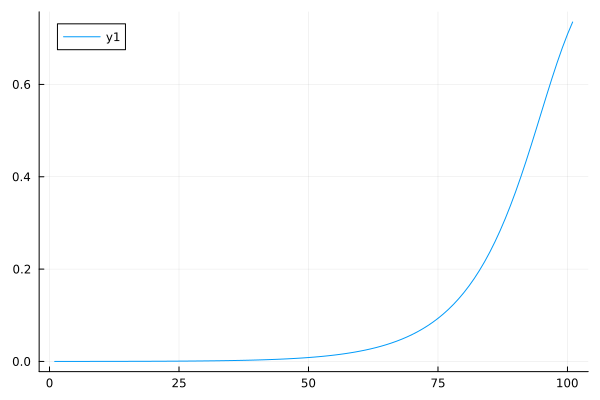

In [135]:
plot(C)

In [111]:
solution_F[1:end,end]

99-element Vector{Any}:
 10.110317821809401
  4.455533780344963
  2.698529719576964
  1.8784222947896507
  1.41711921695021
  1.1275192050831975
  0.9319513467172349
  0.7928271175001987
  0.6899320605044025
  0.6115187147506838
  0.5503407063188214
  0.5017113951459913
  0.46248067267083026
  ⋮
 -3.901233200174903
 -3.4763360937850263
 -2.791174615405911
 -1.8112455770133837
 -0.5234426379556602
  1.050704708484728
  2.8449970102089344
  4.7502045853796995
  6.642202898558353
  8.472207264883686
 10.57755097864782
 12.620893316183576

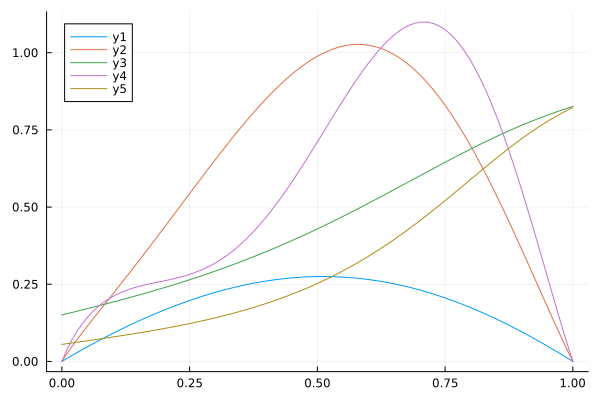

In [101]:
dx=1/N
xx=range(0,1,step=dx)
indeces=sortperm((W_vec.-0.75).^2);
plot(xx,solution_H[:,indeces[1]])
indeces=sortperm((W_vec.-3.).^2);
plot!(xx,solution_H[:,indeces[3]])
plot!(xx,solution_C[:,indeces[3]])
indeces=sortperm((W_vec.-4.5).^2);
plot!(xx,solution_H[:,indeces[9]])
plot!(xx,solution_C[:,indeces[9]])


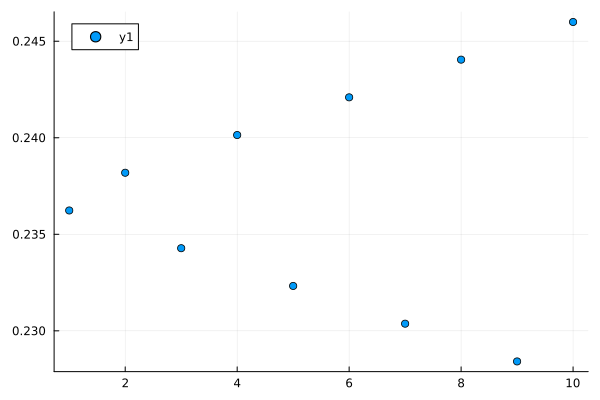

In [55]:
indeces=sortperm((M_vec.-1.2).^2);
scatter(U_vec[indeces[1:10]])

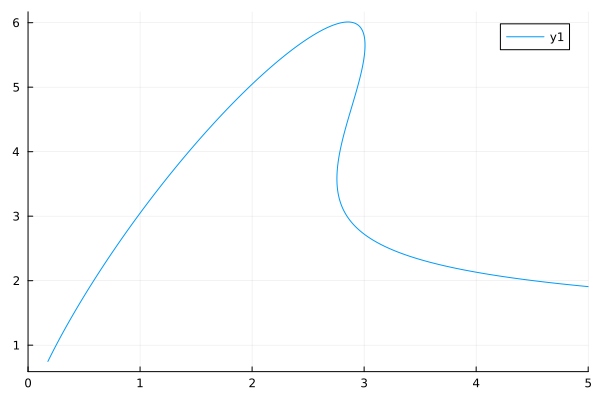

In [95]:
plot(M_vec,U_vec*12.5,xlim=(0,5))

In [86]:
par_mod

(E = 0.51, K = 4.5, A = 1.0, Lsd = 0.12, U = 0.05, W = 2.0, M = 2.0, θ = 1.0, VdW = 0.1, γ = 9.6, mu0 = 0.3, S = Main.ExtraFun.S, expDC = 0.9822712330395684)

In [14]:
dir="data/final/stationary_07_02/"
try
    mkdir(dir)
catch
    println("Folder already exists")
end

M=hcat(M_vec,W_vec,U_vec)

using DelimitedFiles
open(dir*"summary_A_"*string(par_mod.A)*".txt","w") do io
    writedlm(io,M,',')
end
open(dir*"solution_A_"*string(par_mod.A)*".txt","w") do io
    writedlm(io,solution_H,',')
end
open(dir*"solution_C_"*string(par_mod.A)*".txt","w") do io
    writedlm(io,solution_C,',')
end
open(dir*"solution_Flux_"*string(par_mod.A)*".txt","w") do io
    writedlm(io,solution_F,',')
end

Folder already exists


In [ ]:
opt_newton = NewtonPar(tol = 1e-8, verbose =false, maxIter = 3)

sn_codim1 = continuation(branch, 2, (@lens _.K), ContinuationPar(pMax = 5., pMin = 0.0001, detectBifurcation = 1, dsmin=1e-3, ds = 0.01, dsmax = 0.1, nInversion = 10, saveSolEveryStep = 1, maxSteps = 1500, maxBisectionSteps = 55,newtonOptions = opt_newton) ;
	# detection of codim 2 bifurcations with bisection
	detectCodim2Bifurcation = 0,
	# we update the Fold problem at every continuation step
	updateMinAugEveryStep = 1,
	startWithEigen = false,
	# we save the different components for plotting
    recordFromSolution =  (x, p) -> x[end-1],
	)